# Movie plot analysis

#### We will inspect the plot of movies to detect any change in lexical fields with respect to 9/11.

In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Load the data
movies = pd.read_pickle('../data/movies.pkl')
plot_summaries = pd.read_pickle('../data/plot_summaries.pkl')

movies_and_plot = pd.merge(left=movies, right=plot_summaries, on='Wikipedia_movie_ID')
movies_and_plot.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,nb_languages,nb_country,nb_genre,Movie_language,FirstLanguage_Name,SecondLanguage_Name,FirstCountry_Name,SecondCountry_Name,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1,1,7,[English ],English,None,United States of America,None,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1,1,3,[English ],English,None,United Kingdom,None,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],[Drama],1,1,1,[German ],German,None,Germany,None,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1,1,4,[English ],English,None,South Africa,None,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1,1,7,[English ],English,None,United States of America,None,"Adam, a San Francisco-based artist who works a..."


### Clustering

In [3]:
df_plots = movies_and_plot[['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Plot']]
df_plots

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,"Adam, a San Francisco-based artist who works a..."
...,...,...,...,...,...
35966,23851782,/m/06_vb43,The Ghost Train,1941-05-03 00:00:00+00:00,{{plot}} The film opens with a Great Western e...
35967,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19 00:00:00+00:00,Two former National Oceanic Atmospheric Admini...
35968,34980460,/m/0g4pl34,Knuckle,2011-01-21 00:00:00+00:00,{{No plot}} This film follows 12 years in the ...
35969,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21 00:00:00+00:00,"The story takes place in the year 2092,The Sup..."


In [4]:
df_plots_after = df_plots[df_plots['Movie_release_date'].dt.year > 1945]
df_plots_before = df_plots[df_plots['Movie_release_date'].dt.year <= 1945]

df_plots_after.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,"Adam, a San Francisco-based artist who works a..."


In [5]:
import itertools

plots_before = df_plots_before['Plot'].apply(lambda x: x.lower().split()).to_list()
plots_after = df_plots_after['Plot'].apply(lambda x: x.lower().split()).to_list()

text_before = list(itertools.chain.from_iterable(plots_before))
text_after = list(itertools.chain.from_iterable(plots_after))

In [21]:
from collections import Counter

counter_all = Counter(text_before)
counter_all.update(text_after)

counter_before = Counter(text_before)
counter_after = Counter(text_after)

dict_all = dict(counter_all)
dict_before = dict(counter_before)
dict_after = dict(counter_after)

for key in dict_all.keys():
    if key not in dict_before:
        dict_before[key] = 0
    if key not in dict_after:
        dict_after[key] = 0

dict_all = dict(sorted(dict_all.items()))
dict_before = dict(sorted(dict_before.items()))
dict_after = dict(sorted(dict_after.items()))

for k, v in dict_before.items():
    dict_before[k] = v / len(df_plots_before)

for k, v in dict_after.items():
    dict_after[k] = v / len(df_plots_after)

In [7]:
counter_all.most_common(70)

[('the', 685963),
 ('to', 408556),
 ('and', 383448),
 ('a', 314938),
 ('of', 218276),
 ('is', 188649),
 ('in', 182609),
 ('his', 166434),
 ('he', 148035),
 ('with', 117609),
 ('that', 117056),
 ('her', 114395),
 ('for', 80567),
 ('she', 78566),
 ('by', 77918),
 ('as', 74591),
 ('on', 67522),
 ('they', 61531),
 ('but', 60135),
 ('who', 59371),
 ('him', 58690),
 ('at', 54171),
 ('from', 51028),
 ('an', 49071),
 ('has', 48388),
 ('their', 45503),
 ('are', 42857),
 ('when', 42528),
 (',', 37469),
 ('after', 37118),
 ('it', 35181),
 ('into', 32730),
 ('out', 31490),
 ('be', 29533),
 ('up', 28192),
 ('was', 27554),
 ('not', 25480),
 ('one', 24891),
 ('then', 23400),
 ('which', 22595),
 ('them', 22153),
 ('while', 22060),
 ('about', 21491),
 ('have', 20228),
 ('where', 18798),
 ('this', 18738),
 ('will', 18167),
 ('two', 17824),
 ('back', 17807),
 ('.', 17754),
 ('all', 17518),
 ('tells', 16432),
 ('had', 15418),
 ('new', 14820),
 ('him.', 14624),
 ('only', 14492),
 ('been', 14475),
 ('get', 

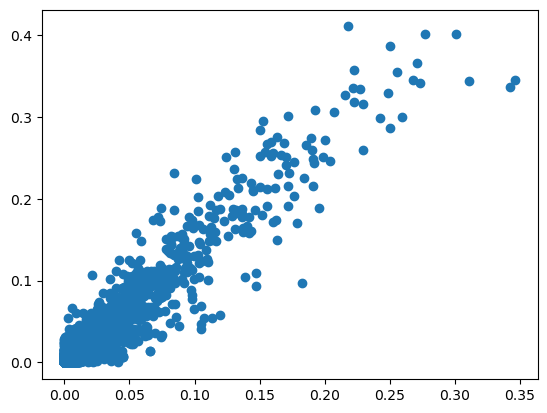

In [22]:
for word, count in counter_all.most_common(60):
    dict_before.pop(word)
    dict_after.pop(word)

plt.scatter(dict_before.values(), dict_after.values())
plt.show()

#### Let us first analyse the plots in a simple manner. Let us check the number of occurences of key words in plots. 

In [9]:
key_words = ['plane', 'tower', 'twin tower', 'terrorism', 'terrorist', 'hijack', 'islam', 'world trade center']

In [ ]:
df_plots = movies_and_plot[['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Plot']]
col_name_of_key_words = ['Count_of_' + '_'.join(word.split(' ')) for word in key_words]

def flag_count(plot_summary, key_word):
    return 1 if plot_summary.lower().count(key_word) > 0 else 0

for i in range(len(key_words)):
    df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: flag_count(x, key_word=key_words[i]))

df_plots.head()

C:\Users\mirco\AppData\Local\Temp\ipykernel_14296\2042482976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: cust_count(x, key_word=key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_14296\2042482976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: cust_count(x, key_word=key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_14296\2042482976.py:9: Set

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Plot,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,"Set in the second half of the 22nd century, th...",1,0,0,0,0,0,0,0
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,A series of murders of rich young women throug...,0,0,0,0,0,0,0,0
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,"Eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,"Every hundred years, the evil Morgana returns...",0,0,0,0,0,0,0,0
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,"Adam, a San Francisco-based artist who works a...",0,0,0,0,0,0,0,0


In [11]:
df_key_words_occ = df_plots.groupby(by=df_plots['Movie_release_date'].dt.year)[col_name_of_key_words].sum()
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center
Movie_release_date,,,,,,,,
1894.0,0,0,0,0,0,0,0,0
1895.0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,0
1898.0,0,0,0,0,0,0,0,0
1899.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2010.0,41,12,0,4,36,7,13,2
2011.0,28,14,0,1,10,4,4,1
2012.0,23,10,0,1,11,5,2,0


In [12]:
df_key_words_occ['Count_movies'] = movies_and_plot.groupby(by=movies_and_plot['Movie_release_date'].dt.year)['Wikipedia_movie_ID'].count()
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
Movie_release_date,,,,,,,,,
1894.0,0,0,0,0,0,0,0,0,2
1895.0,0,0,0,0,0,0,0,0,1
1896.0,0,0,0,0,0,0,0,0,3
1898.0,0,0,0,0,0,0,0,0,5
1899.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2010.0,41,12,0,4,36,7,13,2,1060
2011.0,28,14,0,1,10,4,4,1,784
2012.0,23,10,0,1,11,5,2,0,530


Text(0, 0.38, 'Number of occurences of the word')

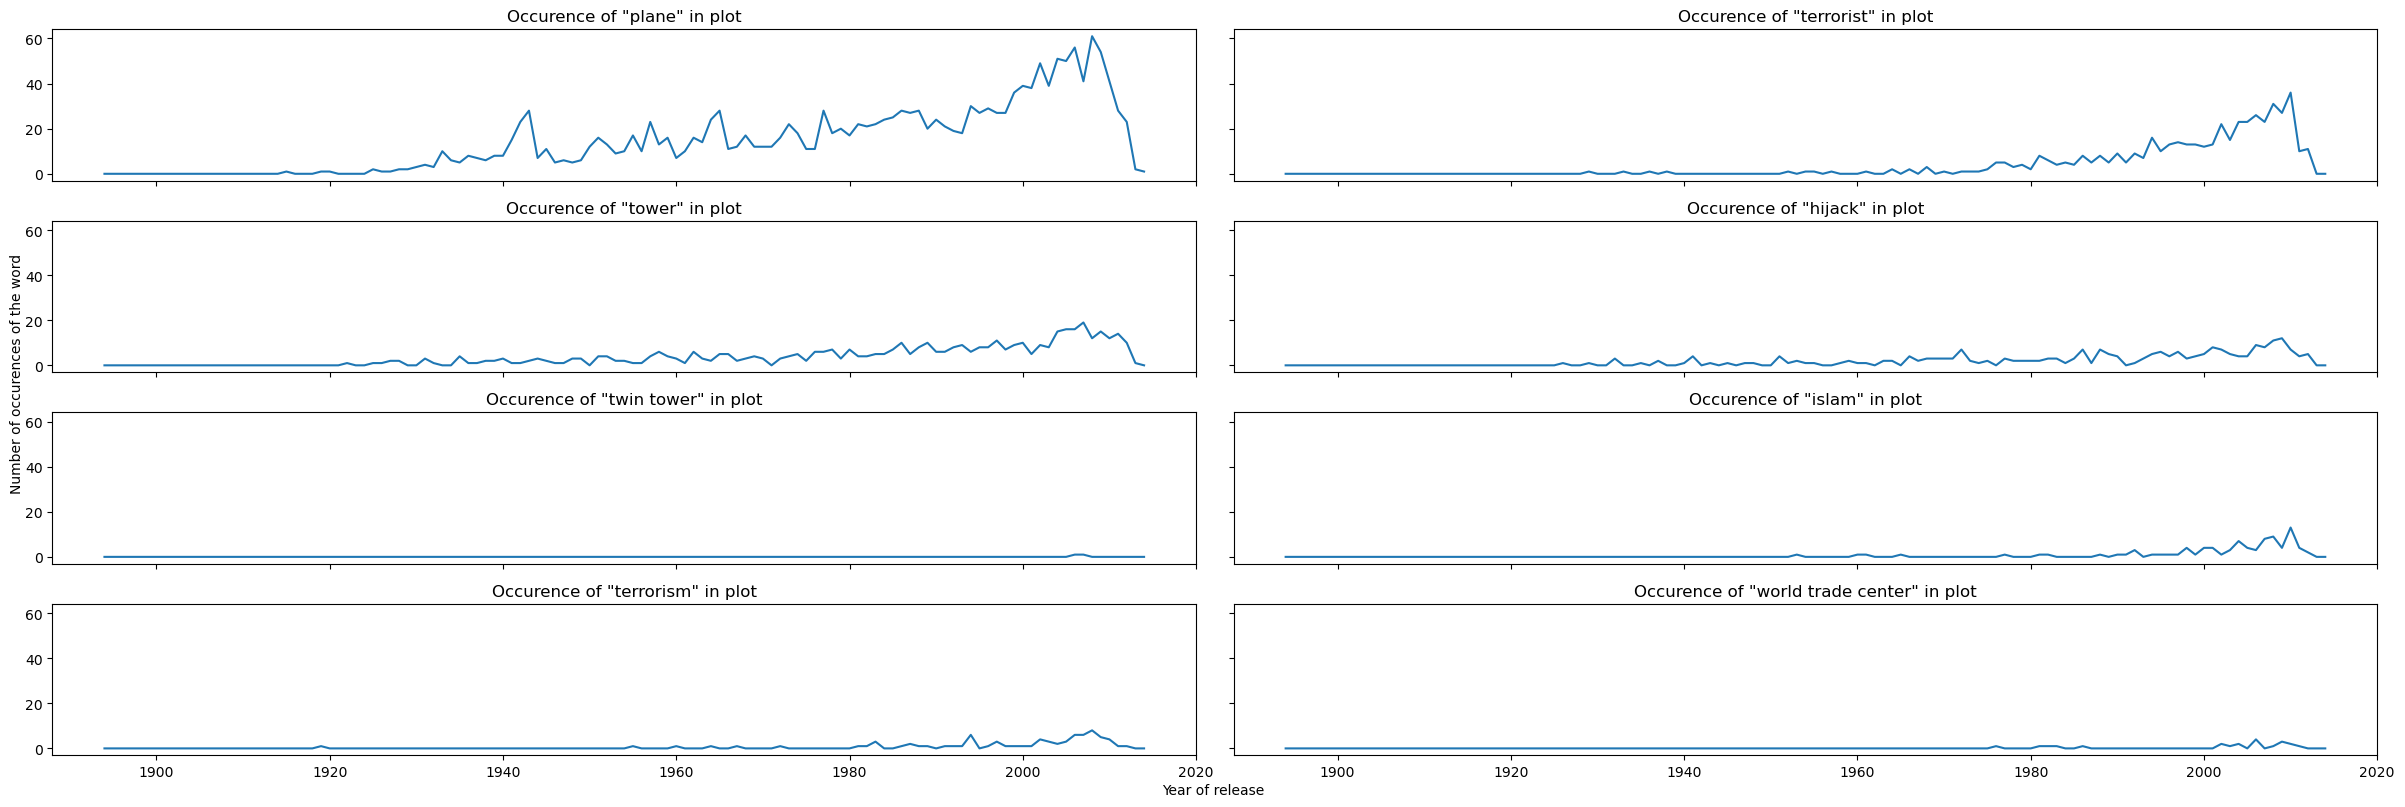

In [13]:
fig, ax = plt.subplots(math.ceil(len(key_words)/2), 2, figsize= (math.ceil(len(key_words)/2)*6, 8), sharey = True, sharex = True)

for i in range(len(key_words)):
    sbplt = ax[i%math.ceil(len(key_words)/2), math.floor(i/math.ceil(len(key_words)/2))]
    col_name = col_name_of_key_words[i]

    sbplt.plot(df_key_words_occ[col_name])
    sbplt.set_title('Occurence of "' + key_words[i] + '" in plot')
    
if (len(key_words) % 2 != 0):
    fig.delaxes(ax[math.floor(len(key_words)/2), 1])

fig.tight_layout()

fig.text(0.48,0, "Year of release")
fig.text(0,0.38, "Number of occurences of the word", rotation = 90)


#### Now by percentage 

In [14]:
df_key_words_occ_i = df_key_words_occ.reset_index()
df_key_words_occ_before = df_key_words_occ_i[(1992 <= df_key_words_occ_i['Movie_release_date']) * (df_key_words_occ_i['Movie_release_date'] < 2003) == 1]
df_key_words_occ_after = df_key_words_occ_i[(2003 <= df_key_words_occ_i['Movie_release_date'])  * (df_key_words_occ_i['Movie_release_date'] <= 2013) == 1]

In [15]:
df_key_words_occ_after

,Movie_release_date,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
104,2003.0,39,8,0,3,15,5,3,1,931
105,2004.0,51,15,0,2,23,4,7,2,968
106,2005.0,50,16,0,3,23,4,4,0,1119
107,2006.0,56,16,1,6,26,9,3,4,1356
108,2007.0,41,19,1,6,23,8,8,0,1332
109,2008.0,61,12,0,8,31,11,9,1,1409
110,2009.0,54,15,0,5,27,12,4,3,1292
111,2010.0,41,12,0,4,36,7,13,2,1060
112,2011.0,28,14,0,1,10,4,4,1,784
113,2012.0,23,10,0,1,11,5,2,0,530


In [16]:
df_key_words_occ_before

,Movie_release_date,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
93,1992.0,19,8,0,1,9,1,3,0,441
94,1993.0,18,9,0,1,7,3,0,0,506
95,1994.0,30,6,0,6,16,5,1,0,521
96,1995.0,27,8,0,0,10,6,1,0,481
97,1996.0,29,8,0,1,13,4,1,0,551
98,1997.0,27,11,0,3,14,6,1,0,596
99,1998.0,27,7,0,1,13,3,4,0,606
100,1999.0,36,9,0,1,13,4,1,0,639
101,2000.0,39,10,0,1,12,5,4,0,686
102,2001.0,38,5,0,1,13,8,4,0,736


In [17]:
df_key_words_occ_comp = pd.DataFrame(data={
    '1992-2002': df_key_words_occ_before.sum() / df_key_words_occ_before['Count_movies'].sum(),
    '2003-2013': df_key_words_occ_after.sum() / df_key_words_occ_after['Count_movies'].sum()
    })

df_key_words_occ_comp.drop(['Movie_release_date', 'Count_movies']).map(lambda x: str(round(x*100, 3)) + '%')

,1992-2002,2003-2013
Count_of_plane,5.15%,4.115%
Count_of_tower,1.367%,1.273%
Count_of_twin_tower,0.0%,0.018%
Count_of_terrorism,0.304%,0.36%
Count_of_terrorist,2.157%,2.076%
Count_of_hijack,0.79%,0.637%
Count_of_islam,0.319%,0.526%
Count_of_world_trade_center,0.03%,0.129%


It is interesting to see that for the word "plane", it is less used after 9/11 than before, even though you would expect to have more.

### Clustering